---
# 1. Introduction

Objectifs pédagogiques :

- Découvrir la structure du dataset Airbnb

- Comprendre les variables et leur signification

- Identifier les premières tendances, anomalies et relations
---

Sur ce qui suit, nous allons travailler sur le Dataset Airbnb, et plus précisemment sur la ville d'Amsterdam. Nous travaillons sur la version simplifié de ce dataset et non sur la version complète.

En parallèle de votre travail sur ce Notebook, je vous invite à visiter le site : https://insideairbnb.com/fr/

En regardant le site, essayer de retrouver le data dictionnary


# 2. Chargement des données

In [11]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.387610,4.89188,Private room,132.0,3,311,2025-09-07,1.87,1,17,33,0363 974D 4986 7411 88D8
1,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.367750,4.89092,Private room,89.0,2,732,2025-09-07,3.99,2,126,93,0363 607B EA74 0BD8 2F6F
2,29051,Comfortable single / double room,124245,Edwin,NaN,Centrum-Oost,52.365840,4.89111,Private room,61.0,2,849,2025-09-08,4.81,2,95,86,0363 607B EA74 0BD8 2F6F
3,44391,Quiet 2-bedroom Amsterdam city centre apartment,194779,Jan,NaN,Centrum-Oost,52.371680,4.91471,Entire home/apt,NaN,3,42,2022-08-20,0.23,1,0,0,0363 E76E F06A C1DD 172C
4,48373,Cozy family home in Amsterdam South,220434,Vesna & Misha,NaN,Buitenveldert - Zuidas,52.327808,4.87680,Entire home/apt,NaN,3,5,2024-04-28,0.19,1,0,0,0363 4A2B A6AD 0196 F684


In [1]:
import pandas as pd

df = pd.read_csv("listings.csv")   # ou listings_summary.csv selon version
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10480 non-null  int64  
 1   name                            10480 non-null  object 
 2   host_id                         10480 non-null  int64  
 3   host_name                       10477 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10480 non-null  object 
 6   latitude                        10480 non-null  float64
 7   longitude                       10480 non-null  float64
 8   room_type                       10480 non-null  object 
 9   price                           5874 non-null   float64
 10  minimum_nights                  10480 non-null  int64  
 11  number_of_reviews               10480 non-null  int64  
 12  last_review                     

### Questions

- Combien de lignes et de colonnes contient le dataset ?
Il y a 18 colonne et 10480 lignes
- Quelles variables semblent contenir des valeurs manquantes ?
neighbourhood_group
- Les types (int, float, object) vous semblent-ils corrects ?

# 3. Exploration univariable
## A. Variables continue

In [2]:
df[['price', 'number_of_reviews', 'availability_365']].describe()

,price,number_of_reviews,availability_365
count,5874.000000,10480.000000,10480.000000
mean,336.785155,47.813359,93.999809
std,1985.661882,131.507440,122.276158
min,35.000000,0.000000,0.000000
25%,161.000000,3.000000,0.000000
50%,222.000000,10.000000,20.000000
75%,314.000000,30.000000,173.000000
max,80018.000000,5097.000000,365.000000


### Questions
- Quelle est la médiane et la dispersion des prix ?
bah la médiane c'est 50% donc 222€ et la dispersion c'est std donc 1985€
- Le prix a-t-il une distribution symétrique (suit la loi normal) ? (justifiez avec un graphique)
Non elle est asymétrique à droite donc ne suit pas la loi normal

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'], bins=100)
plt.title("Distribution du prix des logements")
plt.show()


### Questions

- Observe-t-on des valeurs extrêmes ? Quelles hypothèses possibles?
valeurs extreme est 80k€ donc possiblement erreur d'unité
- Que changeriez-vous dans cette visualisation pour mieux comprendre les données ?
dominés par une ou plusieurs valeurs aberantes donc on peut limiter l'échelle de prix ou utiliser une échelle log

## B. Variables Catégorielles

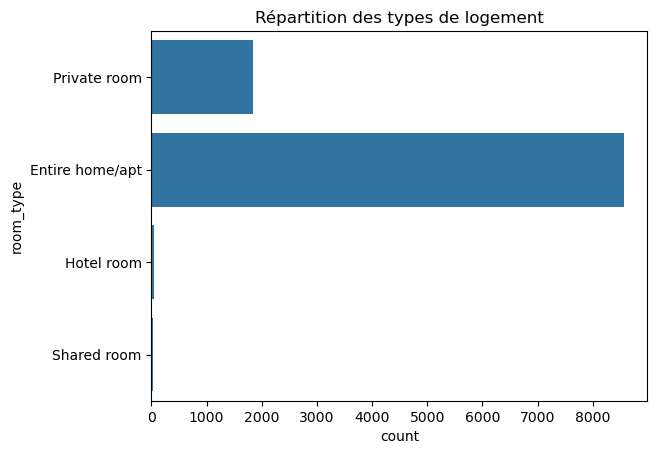

In [5]:
sns.countplot(y='room_type', data=df)
plt.title("Répartition des types de logement")
plt.show()


### Questions

- Quelle catégorie domine ?
bah maison entière 😒
- Comment cela pourrait-il influencer la variable price ? Formuler des hypothèses
bah une maison coute plus chère qu'une chambre

# 4. Exploration bi-variable

## A. Prix selon le type de logement

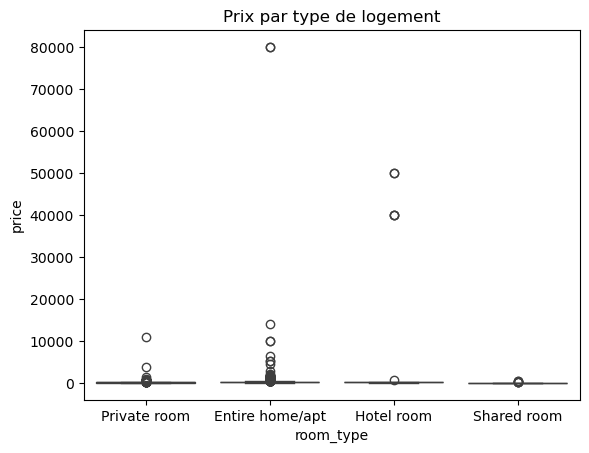

In [6]:
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Prix par type de logement")
plt.show()


### Questions

- Quelle catégorie présente la plus grande variabilité de prix ?
bah les maisons
- Quelle interprétation pouvez-vous proposer ?
C'est ce qui peut être le plus diversifié !

## B. Corrélations numériques (Prix vs. autres variables)

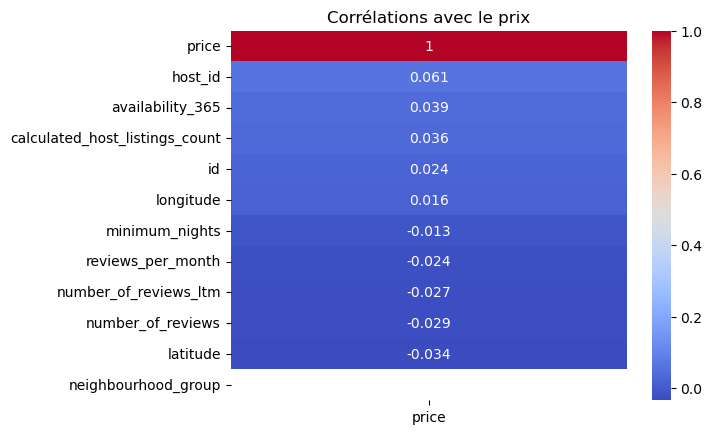

In [7]:
corr = df.select_dtypes('number').corr(numeric_only=True)
sns.heatmap(corr[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title("Corrélations avec le prix")
plt.show()


### Questions

- Quelles variables sont le plus corrélées au prix ? Peut-on en déduire quelque chose?
en premier le prix qui est logique puis l'host_id car chacun choisis son prix mais est-ce qu'on peut mieux faire que valider nos compétences de lecture

# 5. Exploration spatiale et temporelle

## A. Exploration spatiale

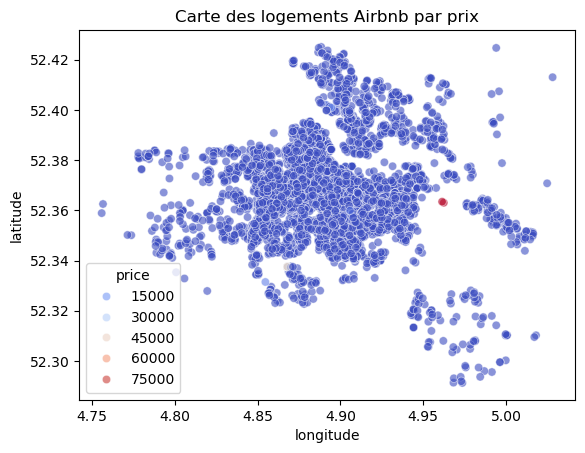

In [8]:
sns.scatterplot(x='longitude', y='latitude', hue='price', data=df, palette='coolwarm', alpha=0.6)
plt.title("Carte des logements Airbnb par prix")
plt.show()


### Questions

- Observe-t-on une concentration géographique particulière des logements chers ?
bah dans la mer parce que c'est des yautch et au centre (intra-muros) parce que c'est au centre
- Quels facteurs (proximité du centre, tourisme) pourraient expliquer cela ?
bah au centre car proche de tout

## B. Exploration Temporelle (nombre de logements disponible vs. nombre de jours de disponibilités sur l'année)

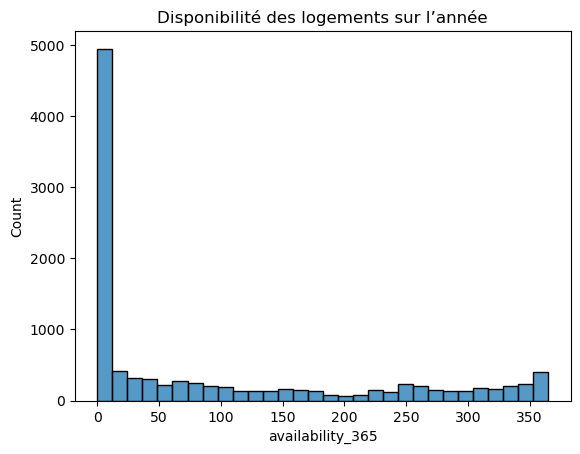

In [9]:
sns.histplot(df['availability_365'], bins=30)
plt.title("Disponibilité des logements sur l’année")
plt.show()


### Questions
- Que révèle cette distribution sur la disponibilité ?
le pic à 0 montre beaucoup de logement non disponible
- Qu'est ce qui pourrait expliquer les logement vacants toute l'année?
annonces nouvelles ou non demandés

# 6. Exploration multi-variables

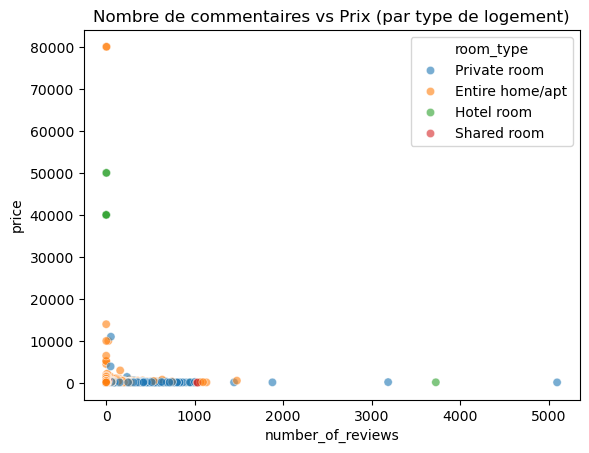

In [10]:
sns.scatterplot(x='number_of_reviews', y='price', hue='room_type', data=df, alpha=0.6)
plt.title("Nombre de commentaires vs Prix (par type de logement)")
plt.show()


### Questions

- Les logements les plus chers ont-ils plus ou moins d’avis ?
On voit que les logements les plus chère on moins d'avis
- Quelle hypothèse cela suggère-t-il sur la clientèle Airbnb ?
plus chère veut aussi dire moins occupé car moins de personne ont le budget

# 7. Synthèse / Discussion

### Questions de réflexion
1. Quelles variables semblent les plus influentes sur le prix ?
le choix entre appartement/maison, sa localisation
3. Avez-vous observé des anomalies (prix extrêmes, valeurs incohérentes) ?
oui, donné de voisinnage indisponible, prix extreme sur certains biens
5. Quelles transformations envisageriez-vous avant de modéliser (log, normalisation, catégorisation) ?
passer en log me parait bien pour avoir une meilleur représentation visuelle et réduire l'importance des extremes
7. Que voudriez-vous explorer davantage si vous aviez plus de temps ?
Rien de plus, ce sont déjà des résultats logique qui ne nécessite pas de passer autant de temps

# 7. Synthèse / Discussion

## 7.1 Variables qui influencent le plus le prix

D’après l’analyse exploratoire et les intuitions issues du domaine, la variable qui semble le plus fortement influencer le prix des logements est **la localisation**. Le quartier ou la zone géographique (par exemple via `neighbourhood` ou une agrégation par secteur) joue un rôle central : certains quartiers concentrent des logements nettement plus chers, liés à l’attractivité touristique, à la proximité du centre-ville ou de points d’intérêt (transport, lieux culturels, zones d’affaires, etc.).  

Loin derrière, **le nombre d’avis** apparaît également comme une variable explicative intéressante. Il ne détermine pas directement le prix, mais il peut être associé à une forme de légitimité ou de confiance : un logement très bien noté avec beaucoup d’avis peut se permettre un prix plus élevé, tandis qu’un logement avec peu ou pas d’avis peut rester plus bas pour attirer ses premiers clients.

D’autres variables jouent probablement un rôle secondaire (type de logement, contraintes de durée minimale du séjour, disponibilité…), mais dans cette première exploration, **la localisation** reste le facteur dominant, avec **le nombre d’avis** comme variable d’importance plus modérée.

---

## 7.2 Anomalies et données atypiques

L’examen des données met en évidence plusieurs types de valeurs problématiques ou atypiques :

- **Prix extrêmement élevés ou aberrants**, qui se démarquent nettement du reste de la distribution. Ces valeurs peuvent correspondre à des biens réellement très haut de gamme, mais elles peuvent aussi être le résultat d’erreurs de saisie (par exemple un zéro de trop).
- **Logements avec 365 jours de disponibilité**, ce qui peut signifier soit une réelle disponibilité totale sur l’année, soit une annonce peu réaliste ou mal renseignée. Ce type de profil mérite une attention particulière.
- **Valeurs manquantes ou incohérentes** dans certaines colonnes, qui rendent l’interprétation plus délicate (ex. informations absentes sur le quartier, le type de logement, ou certaines caractéristiques descriptives).
- **Lignes incomplètes**, où toutes les variables attendues ne sont pas renseignées, ce qui pose un problème direct pour l’entraînement d’un modèle et peut nécessiter un nettoyage (suppression des lignes, imputation, etc.).

Ces anomalies ne sont pas rares dans des données réelles de plateformes en ligne. Elles rappellent qu’une phase de **data cleaning** sérieuse est indispensable avant toute modélisation.

---

## 7.3 Transformations envisagées avant modélisation

Si l’objectif est ensuite d’entraîner un modèle de prédiction du prix, plusieurs transformations semblent pertinentes :

- **Transformation en logarithme du prix** : le prix présente généralement une distribution très asymétrique, avec une longue traîne de logements chers. Passer en `log(price)` permet de réduire l’impact des valeurs extrêmes et de rendre la relation entre le prix et les autres variables plus “linéaire” et plus stable.
- **Encodage des variables catégorielles** (quartier, type de logement, etc.) : ces variables doivent être transformées en variables numériques, par exemple via un encodage one-hot, ou en regroupant certains niveaux rares.
- **Regroupement de catégories**, notamment pour les logements “non habituels” ou très spécifiques. Plutôt que de conserver de nombreuses catégories très peu représentées, on peut en créer des groupes plus larges afin d’éviter la sur-fragmentation des données.
- **Traitement des valeurs aberrantes** (outliers) sur le prix ou d’autres variables : filtrage ou capage (par exemple en coupant la distribution au 99e percentile) afin d’éviter que quelques valeurs extrêmes ne biaisent le modèle.
- **Gestion des valeurs manquantes** : soit par imputation (moyenne, médiane, catégorie “manquante”), soit par suppression des lignes concernées si leur proportion reste limitée.

Dans un contexte réel, on complèterait ces idées par une recherche documentaire ou des tests itératifs : l’idée est d’utiliser son **esprit critique** pour évaluer l’impact de chaque transformation et ajuster progressivement l’approche en fonction des performances du modèle.

---

## 7.4 Pistes d’exploration si l’on disposait de plus de temps

Avec davantage de temps pour explorer le dataset, plusieurs axes pourraient être approfondis :

- **Affiner l’analyse spatiale** : étudier la variation des prix à un niveau plus fin (par rues, zones micro-locales, ou via des cartes de chaleur) afin de mieux comprendre les effets de localisation.
- **Croiser prix, disponibilité et nombre d’avis** : analyser comment ces trois dimensions interagissent (par exemple, logements très disponibles mais peu commentés, ou au contraire très demandés avec beaucoup d’avis, etc.).
- **Étudier plus précisément certains types de logements “non habituels”** (hébergements atypiques, logements très haut de gamme, etc.) pour voir s’ils suivent des logiques de prix différentes du marché “standard”.
- **Introduire une dimension temporelle** (si les données le permettent), en examinant la saisonnalité de la demande et des prix : périodes de vacances, événements locaux, festivals, etc.

Ces pistes serviraient soit à **raffiner le modèle de prédiction**, soit à **mieux comprendre la structure du marché Airbnb** dans la ville étudiée, en identifiant des segments spécifiques et des comportements atypiques.

---



# 8. Pour aller plus loin
- Refaites les graphiques précédent avec un dataset nettoyé (e.g., en supprimant les outliers/en les traitant à part).
- Faites une EDA du dataset par neighbourhood.